# Required libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys
import os

In [22]:
# Add project path
sys.path.append(os.path.abspath(".."))

# Import database connection module
from database.db_connection import DatabaseConnector

# Handle database connection
try:
    db_connector = DatabaseConnector()
    engine = db_connector.get_engine()
except Exception as e:
    print(f"Error connecting to the database: {e}")
    sys.exit(1)  # Exit on connection failure

# Load data from the database
try:
    forecast_df = pd.read_sql("SELECT * FROM historical_forecast;", engine)
    weather_df = pd.read_sql("SELECT * FROM historical_weather;", engine)
except Exception as e:
    print(f"Error loading data from the database: {e}")
    sys.exit(1)  # Exit on data loading failure

# Feature Engineering: Extract month from datetime

In [23]:
weather_df['month'] = weather_df['datetime'].dt.month

# Define features (X) and target (y) and split data into training and testing sets

In [24]:
X = weather_df[['month', 'relative_humidity_2m', 'wind_speed_10m']]  # Select relevant features
y = weather_df['temperature_2m']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models

In [25]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Train models

In [26]:
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions

In [27]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models

In [28]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics

In [29]:
print("=== Linear Regression ===")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

print("\n=== Random Forest Regressor ===")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

=== Linear Regression ===
Mean Squared Error (MSE): 3.65
R²: 0.33

=== Random Forest Regressor ===
Mean Squared Error (MSE): 3.91
R²: 0.28


# Feature importance from Random Forest

In [30]:
feature_importances = rf_model.feature_importances_
print("\nFeature Importances (Random Forest):")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")


Feature Importances (Random Forest):
month: 0.00
relative_humidity_2m: 0.41
wind_speed_10m: 0.59


# Visualization of predictions

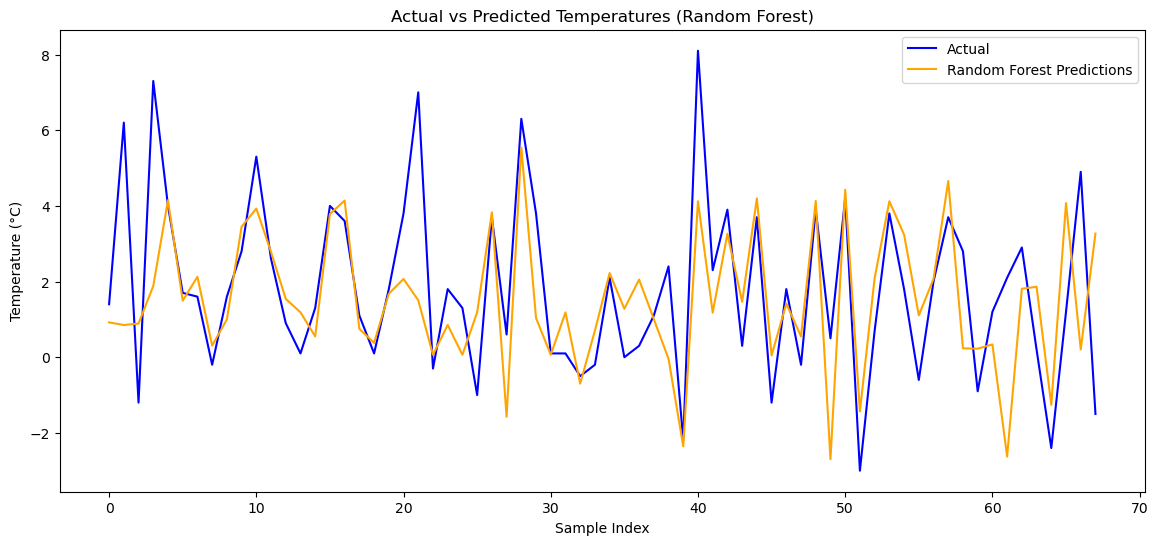

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_rf, label='Random Forest Predictions', color='orange')
plt.title("Actual vs Predicted Temperatures (Random Forest)")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()